In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500

(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)

print(len(input_train),'train sequences')
print(len(input_test),'test sequences')

input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ',input_test.shape)

Using TensorFlow backend.


25000 train sequences
25000 test sequences
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [4]:
input_train[:100]

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,   66,   52,  277],
       [   0,    0,    0, ...,  381,   18,   15],
       [   0,    0,    0, ..., 2450, 5486, 3298]])

In [5]:
# Train model with embedding and LTSM layers
from keras.models import Sequential
from keras.layers import Embedding, LSTM, CuDNNLSTM
from keras.layers import Dense
model=Sequential()
model.add(Embedding(max_features,32)) 
model.add(CuDNNLSTM(128))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2 )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 128)               82944     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 403,073
Trainable params: 403,073
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 633us/step - loss: 0.5939 - acc: 0.6946 - val_loss: 0.5646 - val_acc: 0.7424
Epoch 2/10
20000/20000 [==============================] - 4s 198us/step - loss: 0.3598 - acc: 0.8483 - val_loss: 0.3827 - val_acc: 0.8326
Epoch 3/10
20000/20000 [==============================] - 4s 198us/step - 

In [6]:
print(model.layers[1].trainable_weights)

[<tf.Variable 'cu_dnnlstm_2/kernel:0' shape=(32, 512) dtype=float32_ref>, <tf.Variable 'cu_dnnlstm_2/recurrent_kernel:0' shape=(128, 512) dtype=float32_ref>, <tf.Variable 'cu_dnnlstm_2/bias:0' shape=(1024,) dtype=float32_ref>]


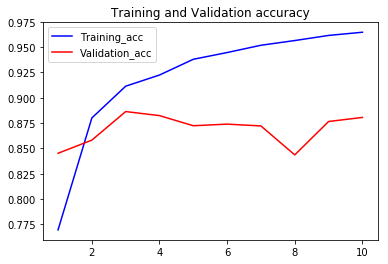

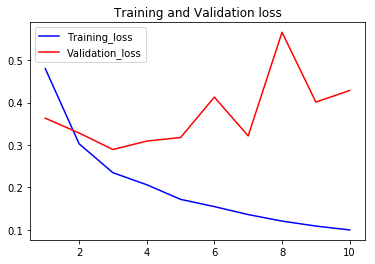

In [13]:
#plot result
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Training_acc')
plt.plot(epochs,val_acc,'r',label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'b',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Validation_loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Now try on the reversed data set to see if there are any difference

In [8]:
#to reversely take the train and test set
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features=10000
maxlen=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

x_train=[x[::-1] for x in x_train]
x_test=[x[::-1] for x in x_test]

x_train=sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=sequence.pad_sequences(x_test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, LSTM, CuDNNLSTM
from keras.layers import Dense
model=Sequential()
model.add(Embedding(max_features,32)) 
model.add(CuDNNLSTM(128))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2 )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 128)               82944     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 403,073
Trainable params: 403,073
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 223us/step - loss: 0.5993 - acc: 0.6889 - val_loss: 0.4122 - val_acc: 0.8216
Epoch 2/10
20000/20000 [==============================] - 4s 201us/step - loss: 0.3706 - acc: 0.8451 - val_loss: 1.8056 - val_acc: 0.5618
Epoch 3/10
20000/20000 [==============================] - 4s 199us/step - l

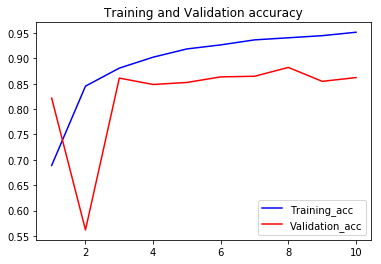

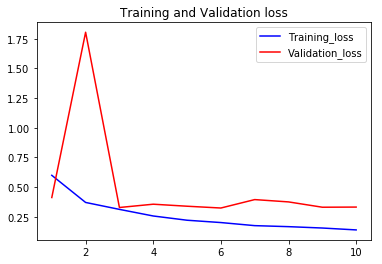

In [9]:
#plot result
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Training_acc')
plt.plot(epochs,val_acc,'r',label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'b',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

## Now try Bidirectional LSTM

In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, CuDNNLSTM, Bidirectional, Dense

max_features=10000
maxlen=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

x_train=sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=sequence.pad_sequences(x_test,maxlen=maxlen)

model= Sequential()
model.add(Embedding(max_features,128))
model.add(Bidirectional(CuDNNLSTM(32)))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 8s 380us/step - loss: 0.4799 - acc: 0.7695 - val_loss: 0.3631 - val_acc: 0.8452
Epoch 2/10
20000/20000 [==============================] - 7s 341us/step - loss: 0.3027 - acc: 0.8801 - val_loss: 0.3281 - val_acc: 0.8582
Epoch 3/10
20000/20000 [==============================] - 7s 341us/step - loss: 0.2344 - acc: 0.9114 - val_loss: 0.2892 - val_acc: 0.8864
Epoch 4/10
20000/20000 [==============================] - 7s 343us/step - loss: 0.2061 - acc: 0.9225 - val_loss: 0.3090 - val_acc: 0.8824
Epoch 5/10
20000/20000 [==============================] - 7s 344us/step - loss: 0.1716 - acc: 0.9380 - val_loss: 0.3174 - val_acc: 0.8724
Epoch 6/10
20000/20000 [==============================] - 7s 341us/step - loss: 0.1545 - acc: 0.9447 - val_loss: 0.4127 - val_acc: 0.8740
Epoch 7/10
20000/20000 [==============================] - 7s 339us/step - loss: 0.1357 - acc: 0.9519 - val_loss: 0.3213 - v

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41472     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,321,537
Trainable params: 1,321,537
Non-trainable params: 0
_________________________________________________________________


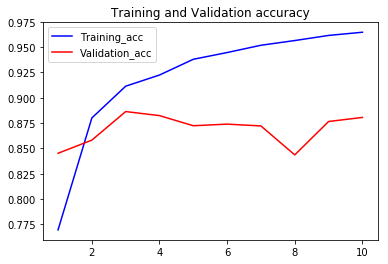

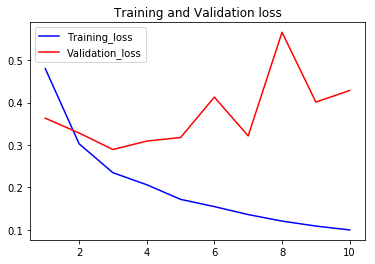

In [12]:
#plot result
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Training_acc')
plt.plot(epochs,val_acc,'r',label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'b',label='Training_loss')
plt.plot(epochs,val_loss,'r',label='Validation_loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()